In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [3]:
class Parameter:
    def __init__(self, data):
        self.data = data
        self.grad = np.zeros_like(data)

def linear_model(X, w, b): return X @ w.data + b.data
def mse_loss(y_true, y_pred): return np.mean((y_true - y_pred)**2)

def compute_gradients(X, y_true, y_pred, w, b):
    n_samples = len(y_true)
    grad_pred = -2 * (y_true - y_pred) / n_samples
    w.grad = X.T @ grad_pred
    b.grad = np.sum(grad_pred)

In [4]:
class Adagrad:
    def __init__(self, params, lr=0.01, eps=1e-8):
        self.params = params
        self.lr = lr
        self.eps = eps
        self.cache = [np.zeros_like(p.data) for p in self.params]
    def step(self):
        for i, p in enumerate(self.params):
            self.cache[i] += p.grad**2
            p.data -= self.lr * p.grad / (np.sqrt(self.cache[i]) + self.eps)
    def zero_grad(self):
        for p in self.params: p.grad = np.zeros_like(p.data)

In [5]:
class SGD:
    def __init__(self, params, lr=0.01):
        self.params = params
        self.lr = lr
    def step(self):
        for p in self.params: p.data -= self.lr * p.grad
    def zero_grad(self):
        for p in self.params: p.grad = np.zeros_like(p.data)

In [6]:
class RMSprop:
    def __init__(self, params, lr=0.01, beta=0.9, eps=1e-8):
        self.params = params
        self.lr = lr
        self.beta = beta
        self.eps = eps
       
        self.cache = [np.zeros_like(p.data) for p in self.params]

    def step(self):
        for i, p in enumerate(self.params):
            # Update cache with the EWMA of the squared gradient
            self.cache[i] = self.beta * self.cache[i] + (1 - self.beta) * (p.grad**2)
            # the RMSprop update
            p.data -= self.lr * p.grad / (np.sqrt(self.cache[i]) + self.eps)

    def zero_grad(self):
        for p in self.params:
            p.grad = np.zeros_like(p.data)

Epoch [10/50], Loss: 0.8357
Epoch [20/50], Loss: 0.8357
Epoch [30/50], Loss: 0.8357
Epoch [40/50], Loss: 0.8357
Epoch [50/50], Loss: 0.8357
Optimizer: SGD (lr=0.01)
Final Weights: w=1.85, b=1.26
Epoch [10/50], Loss: 0.8139
Epoch [20/50], Loss: 0.8113
Epoch [30/50], Loss: 0.8102
Epoch [40/50], Loss: 0.8096
Epoch [50/50], Loss: 0.8093
Optimizer: Adagrad (lr=0.1)
Final Weights: w=1.76, b=1.24
Epoch [10/50], Loss: 0.8231
Epoch [20/50], Loss: 0.8225
Epoch [30/50], Loss: 0.8224
Epoch [40/50], Loss: 0.8224
Epoch [50/50], Loss: 0.8224
Optimizer: RMSprop (lr=0.01)
Final Weights: w=1.78, b=1.27


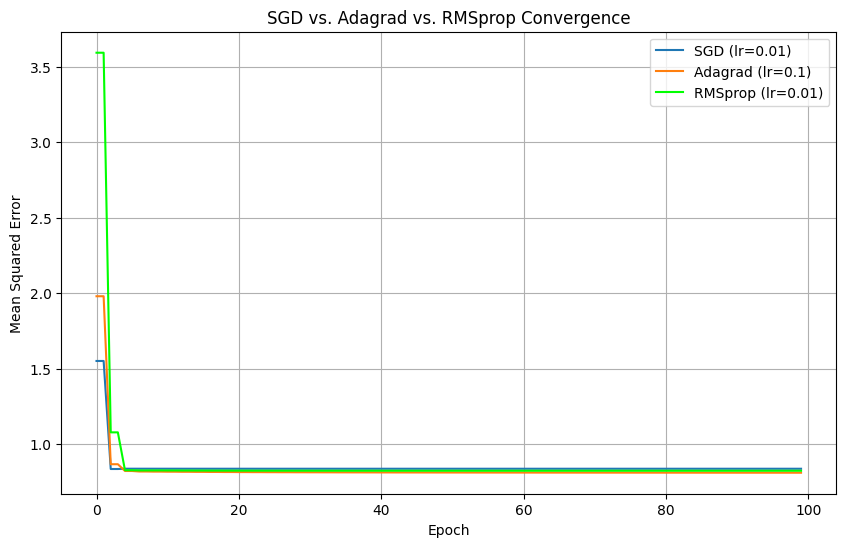

In [7]:
X = 2 * np.random.rand(100, 1)
y = 1 + 2 * X + np.random.randn(100, 1)

def train(optimizer, epochs=50):
    loss_history = []
    for epoch in range(epochs):
        epoch_loss = 0
        for i in range(len(X)):
            x_sample, y_sample = X[i:i+1], y[i:i+1]
            w, b = optimizer.params
            y_pred = linear_model(x_sample, w, b)
            epoch_loss += mse_loss(y_sample, y_pred)
            optimizer.zero_grad()
            compute_gradients(x_sample, y_sample, y_pred, w, b)
            optimizer.step()
        loss_history.append(epoch_loss / len(X))

        current_loss = epoch_loss / len(X)
        loss_history.append(current_loss)
        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {current_loss:.4f}")

    current_lr = getattr(optimizer, 'lr', 'N/A')
    print(f"Optimizer: {optimizer.__class__.__name__} (lr={current_lr})")
    w, b = optimizer.params
    print(f"Final Weights: w={w.data.item():.2f}, b={b.data.item():.2f}")
    return loss_history

# 1. Run with SGD
np.random.seed(42)
w_sgd = Parameter(np.random.randn(1, 1)); b_sgd = Parameter(np.zeros(1))
sgd_optimizer = SGD(params=[w_sgd, b_sgd], lr=0.01)
sgd_losses = train(sgd_optimizer)

# 2. Run with Adagrad
np.random.seed(42)
w_adagrad = Parameter(np.random.randn(1, 1)); b_adagrad = Parameter(np.zeros(1))
adagrad_optimizer = Adagrad(params=[w_adagrad, b_adagrad], lr=0.1)
adagrad_losses = train(adagrad_optimizer)

# 3. Run with RMSprop
np.random.seed(42)
w_rmsprop = Parameter(np.random.randn(1, 1)); b_rmsprop = Parameter(np.zeros(1))
rmsprop_optimizer = RMSprop(params=[w_rmsprop, b_rmsprop], lr=0.01)
rmsprop_losses = train(rmsprop_optimizer)

plt.figure(figsize=(10, 6))
plt.plot(sgd_losses, label='SGD (lr=0.01)')
plt.plot(adagrad_losses, label='Adagrad (lr=0.1)')
plt.plot(rmsprop_losses, label='RMSprop (lr=0.01)', color='lime')
plt.title('SGD vs. Adagrad vs. RMSprop Convergence')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()